In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Step 1: Loading the dataset
df = pd.read_csv('/content/diabetes.csv')

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# Step 2: Data preprocessing
# Handling missing values
# df.dropna(inplace=True)
# applying ffill() method to fill the missing values
df.ffill(inplace=True)

# Splitting features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Step 3: Model building
# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_pred = knn_classifier.predict(X_test_scaled)


In [18]:
# Logistic Regression
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train_scaled, y_train)
logreg_pred = logreg_classifier.predict(X_test_scaled)


In [19]:
# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)
svm_pred = svm_classifier.predict(X_test_scaled)


In [20]:
# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_pred = nb_classifier.predict(X_test_scaled)


In [21]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)
dt_pred = dt_classifier.predict(X_test_scaled)


In [22]:
# Step 4: Model evaluation
# Function to evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("-" * 50)

# Evaluate each model
evaluate_model(y_test, knn_pred, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, logreg_pred, "Logistic Regression")
evaluate_model(y_test, svm_pred, "Support Vector Machine (SVM)")
evaluate_model(y_test, nb_pred, "Naive Bayes")
evaluate_model(y_test, dt_pred, "Decision Tree")


Evaluation for K-Nearest Neighbors (KNN):
Accuracy: 0.6948051948051948
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154

--------------------------------------------------
Evaluation for Logistic Regression:
Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

--------------------------------------------------
Evaluation for Support Vector Machine (SVM):
Accuracy: 0.73376

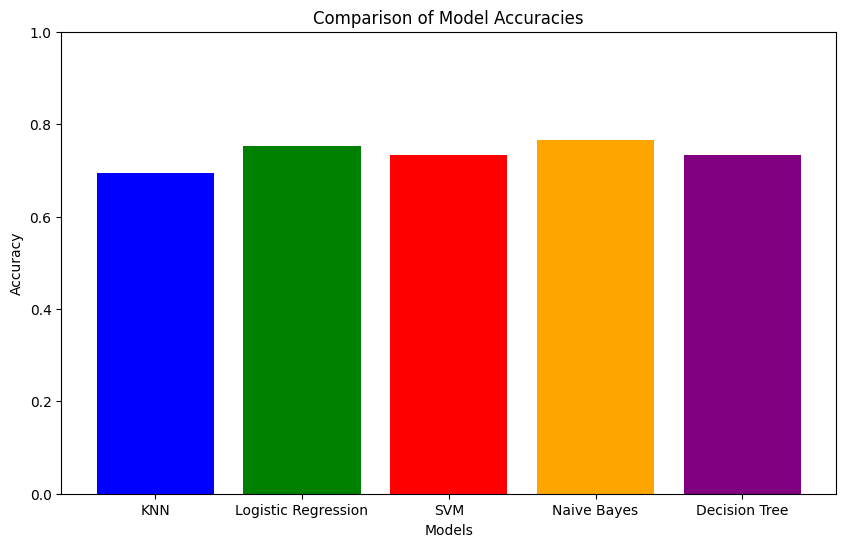

In [23]:
import matplotlib.pyplot as plt

# Function to plot bar graph for model comparison
def plot_comparison_graph(models, accuracies):
    plt.figure(figsize=(10, 6))
    plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange', 'purple'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Model Accuracies')
    plt.ylim(0, 1)
    plt.show()

# Evaluate each model and store accuracy scores
model_names = ["KNN", "Logistic Regression", "SVM", "Naive Bayes", "Decision Tree"]
model_accuracies = []

for pred in [knn_pred, logreg_pred, svm_pred, nb_pred, dt_pred]:
    accuracy = accuracy_score(y_test, pred)
    model_accuracies.append(accuracy)

# Plot the comparison graph
plot_comparison_graph(model_names, model_accuracies)
